In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization


In [2]:
image_directory = 'D:\Programming\Python\Data\Movie_Poster_Dataset\\1983'


# Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('images/movie_metadata.csv')    
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  # Loading only first 2000 datapoints for memory reasons 


          Id                                Genre  Action  Adventure  \
0  tt0086425                  ['Comedy', 'Drama']       0          0   
1  tt0085549        ['Drama', 'Romance', 'Music']       0          0   
2  tt0086465                           ['Comedy']       0          0   
3  tt0086567               ['Sci-Fi', 'Thriller']       0          0   
4  tt0086034  ['Action', 'Adventure', 'Thriller']       1          1   

   Animation  Biography  Comedy  Crime  Documentary  Drama  ...  N/A  News  \
0          0          0       1      0            0      1  ...    0     0   
1          0          0       0      0            0      1  ...    0     0   
2          0          0       1      0            0      0  ...    0     0   
3          0          0       0      0            0      0  ...    0     0   
4          0          0       0      0            0      0  ...    0     0   

   Reality-TV  Romance  Sci-Fi  Short  Sport  Thriller  War  Western  
0           0        0     

In [3]:
from PIL import Image

# Resize posters

SIZE = 200
X_dataset = []  
for i in tqdm(range(df.shape[0])):
    img = Image.open(image_directory + '\\' + df['Id'][i]+'.jpg')
    img = img.resize((SIZE, SIZE))
    img = np.array(img)
    img = img/255.
    X_dataset.append(img)
    
X = np.array(X_dataset)


100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 137.05it/s]


In [4]:
#
print(df['Id'][500])  #King Kong

print(df['Genre'][500])  #Tagged as multiple Genres.


tt0091344
['Action', 'Adventure', 'Horror']


In [5]:
# data processing
y = np.array(df.drop(['Id', 'Genre'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.2)


In [6]:
# Build a model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat). 

model.summary()

#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 196, 196, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0

In [7]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), batch_size=64)



Epoch 1/25
25/25 [==============================] - 76s 3s/step - loss: 0.6896 - accuracy: 0.0700 - val_loss: 0.4811 - val_accuracy: 0.2475
Epoch 2/25
25/25 [==============================] - 73s 3s/step - loss: 0.4348 - accuracy: 0.1400 - val_loss: 0.3162 - val_accuracy: 0.1975
Epoch 3/25
25/25 [==============================] - 75s 3s/step - loss: 0.3575 - accuracy: 0.2131 - val_loss: 0.3341 - val_accuracy: 0.1975
Epoch 4/25
25/25 [==============================] - 75s 3s/step - loss: 0.3296 - accuracy: 0.2156 - val_loss: 0.2653 - val_accuracy: 0.2000
Epoch 5/25
25/25 [==============================] - 74s 3s/step - loss: 0.3133 - accuracy: 0.2581 - val_loss: 0.2748 - val_accuracy: 0.1975
Epoch 6/25
25/25 [==============================] - 72s 3s/step - loss: 0.2985 - accuracy: 0.2744 - val_loss: 0.2612 - val_accuracy: 0.2175
Epoch 7/25
25/25 [==============================] - 71s 3s/step - loss: 0.2927 - accuracy: 0.2819 - val_loss: 0.2521 - val_accuracy: 0.1975
Epoch 8/25
25/25 [==

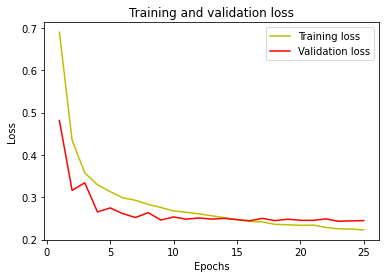

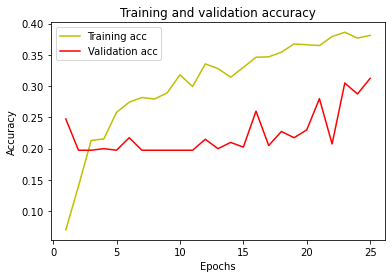

13/13 [==============================] - 4s 285ms/step - loss: 0.2449 - accuracy: 0.3125
Accuracy =  31.25 %


In [8]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################


In [9]:
X_test[1].shape

(200, 200, 3)